In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import itertools

In [2]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams.update({'font.size': 16})

In [3]:
# Define constants
synch_phase=-32/180*np.pi
rf_freq_L=201.24e6
rf_freq_H=804.96e6
proton_mass=938272088.16
electron_mass=510998.95
pmass= proton_mass+2*electron_mass
light_v=299792458

In [4]:
# LE design energy & energy gain
L_energy = np.multiply([0.75,0.80248,0.85820,0.91708,0.97923,1.04473,1.11367,1.18614,1.26220,1.34194,
            1.42543,1.51274,1.60393,1.69909,1.79826,1.90152,2.00894,2.12059,2.23463,2.34869,
            2.46703,2.58974,2.71694,2.84871,2.98516,3.12638,3.27246,3.42351,3.57961,3.74088,
            3.90739,4.07926,4.25658,4.43944,4.62794,4.82218,5.02226,5.22828,5.44033,5.65853,
            5.88298,6.11377,6.35103,6.59485,6.84536,7.10267,7.36691,7.63820,7.91667,8.20247,
            8.49573,8.79662,9.10529,9.42192,9.74669,10.07979,10.421,
            10.421,10.74471,11.07302,11.40634,11.74462,12.08784,12.43599,12.78901,13.14690,
            13.50961,13.87711,14.24937,14.62636,15.00804,15.39438,15.78543,16.18108,16.58129,16.98602,
            17.39523,17.80889,18.22695,18.64938,19.07613,19.50717,19.94245,20.38194,20.82560,21.27338,
            21.72524,22.18114,22.64105,23.10491,23.57269,24.04435,24.51984,24.99913,25.48217,25.96892,
            26.45935,26.95341,27.45106,27.95227,28.45698,28.96518,29.47681,29.99183,30.51022,31.55691,
            32.08515,32.61660,33.15123,33.6889,34.22986,34.77380,35.32078,35.87076,36.42371,36.97961,
            37.53840,
            37.53840,38.28487,39.03687,39.79378,40.55553,41.32205,42.09325,42.8697,43.64943,44.43426,
            45.22349,46.01705,46.81486,47.61686,48.42296,49.23311,50.04724,50.86526,51.68712,
            52.51275,53.34207,54.17503,55.01154,55.85156,56.69500,57.54181,58.39192,59.24526,60.10178,
            60.96140,61.82407,62.68972,63.55829,64.42972,65.30395,66.18092,
            66.18092,67.06008,67.94235,68.82717,69.71449,70.60426,71.49642,72.3909,73.28766,74.18664,
            75.08779,75.99105,76.89636,77.80368,78.71294,79.62411,80.53713,81.45194,82.36849,83.28675,
            84.20665,85.12814,86.05119,86.97574,87.90175,88.82917,89.75794,90.68804,91.61940,92.552,
                        
            92.552,93.53635,94.52273,95.51059,96.49991,97.49065,98.48278,99.47627,100.47109,101.46721,
            102.46459,103.46321,104.46303,105.46403,106.46618,107.46944,108.47379,109.47919,110.48563,
            111.49307,112.50148,113.51084,114.52111,115.53228,116.54431
         ],1e6)

dE_L = []
for i in range(len(L_energy) - 1):
    dE_L.append(L_energy[i+1] - L_energy[i])
dE_L.append(0)

In [5]:
# LE Tank 5 design energy
T5_energy =np.multiply([92.55200,92.552,93.53635,94.52273,95.51059,96.49991,97.49065,98.48278,
            99.47627,100.47109,101.46721,102.46459,103.46321,104.46303,105.46403,106.46618,107.46944,
            108.47379,109.47919,110.48563,111.49307,112.50148,113.51084,114.52111,115.53228,116.54431
         ],1e6)

dE_T5 = []
for i in range(len(T5_energy) - 1):
    dE_T5.append(T5_energy[i+1] - T5_energy[i])
dE_T5.append(0)

In [6]:
# HE design energy & energy gain
H_energy = np.multiply([116.54431,125.1,133.8,142.8,
                        152.1,161.2,170.6,180.2,
                        190.0,199.7,209.5,219.5,
                        229.8,239.9,250.1,260.5,
                        271.1,281.5,292.1,302.8,
                        313.8,324.4,335.2,346.1,
                        357.1,368.1,379.1,390.2,401.5],1e6)

# Interpolation for every cell
interpolated = []
for i in range(len(H_energy) - 1):
    increment = (H_energy[i+1] - H_energy[i]) / 16
    for j in range(16):
        interpolated.append(H_energy[i] + j * increment)
interpolated.append(H_energy[-1])


dE_H = []
for i in range(len(interpolated) - 1):
    dE_H.append(interpolated[i+1] - interpolated[i])
dE_H.append(0)

In [7]:
# HE cell & drift lengths from design geometry
modL = [
    [1.3814,1.4215,1.4606,1.4987],
    [1.5353,1.5704,1.6046,1.6380],
    [1.6700,1.7008,1.7308,1.7600],
    [1.7881,1.8151,1.8414,1.8670],
    [1.8917,1.9155,1.9386,1.9612],
    [1.9829,2.0039,2.0244,2.0443],
    [2.0635,2.0821,2.1002,2.1179]
]

# Drift lengths from design
gapL = [
    [0.1418,0.2628,0.2703,0.2775],
    [0.2846,0.2912,0.2977,0.3041],
    [0.3102,0.3162,0.3218,0.3273],
    [0.3327,0.3379,0.3428,0.3477],
    [0.3524,0.3570,0.3614,0.3657],
    [0.3698,0.3728,0.3777,0.3815],
    [0.3852,0.3887,0.3921,0.3955]
]

In [8]:
# LE dataframe
df_L = pd.DataFrame(L_energy)
df_L.columns =['Energy_cell']
df_L["delE"]=dE_L
df_L["V"] = df_L["delE"]/np.cos(synch_phase)
df_L["Gamma"] = (df_L["Energy_cell"]+pmass)/pmass
df_L['Beta']=np.sqrt(1-1/df_L['Gamma']/df_L['Gamma'])
df_L['L']=df_L['Beta']*light_v/rf_freq_L    ##2pi-mode cavity
df_L['L2'] = df_L['L']

In [9]:
# T5 dataframe
df_t5 = pd.DataFrame(T5_energy)
df_t5.columns =['Energy_cell']
df_t5["delE"]=dE_T5
df_t5["V"] = df_t5["delE"]/np.cos(synch_phase)
df_t5["Gamma"] = (df_t5["Energy_cell"]+pmass)/pmass
df_t5['Beta']=np.sqrt(1-1/df_t5['Gamma']/df_t5['Gamma'])
df_t5['L']=df_t5['Beta']*light_v/rf_freq_L    ##2pi-mode cavity
df_t5['L2'] = df_t5['L']

In [10]:
#df_L['L'].iloc[207] = 0.69
df_t5.tail(10)

,Energy_cell,delE,V,Gamma,Beta,L,L2
16,107469440.0,1004350.0,1.184308e+06,1.114415,0.441357,0.657501,0.657501
17,108473790.0,1005400.0,1.185546e+06,1.115484,0.443101,0.660100,0.660100
18,109479190.0,1006440.0,1.186772e+06,1.116555,0.444836,0.662683,0.662683
19,110485630.0,1007440.0,1.187951e+06,1.117626,0.446560,0.665253,0.665253
20,111493070.0,1008410.0,1.189095e+06,1.118699,0.448275,0.667807,0.667807
21,112501480.0,1009360.0,1.190216e+06,1.119772,0.449980,0.670347,0.670347
22,113510840.0,1010270.0,1.191289e+06,1.120847,0.451675,0.672872,0.672872
23,114521110.0,1011170.0,1.192350e+06,1.121923,0.453361,0.675383,0.675383
24,115532280.0,1012030.0,1.193364e+06,1.122999,0.455037,0.677880,0.677880
25,116544310.0,0.0,0.000000e+00,1.124076,0.456703,0.680362,0.680362


In [11]:
# HE dataframe
df_H = pd.DataFrame(interpolated)
df_H.columns =['Energy_cell']
df_H["delE"]=dE_H
df_H["V"] = df_H["delE"]/np.cos(synch_phase)
df_H["Gamma"] = (df_H["Energy_cell"]+pmass)/pmass
df_H['Beta']=np.sqrt(1-1/df_H['Gamma']/df_H['Gamma'])
df_H['L']=df_H['Beta']*light_v/rf_freq_H/2    ##pimode cavity

cells = []
gaps = []
for i in range(7):
    for j in range(4):
        for k in range(16):
            cells.append(modL[i][j]/16.0)
            gaps.append(gapL[i][j])

cells.append(gaps[-1])
print(len(cells))
df_H['L2'] = cells

for i in range(1,28):
    n=i*16-1
    df_H.loc[n+0.5]=df_H.loc[n+1]
    df_H.loc[n+0.5,'V']=0
    df_H.loc[n+0.5,'delE']=0
    df_H.loc[n+0.5,'L']=float(df_H.loc[n+0.5,'L']*4)
    df_H.loc[n+0.5,'L2']=float(gaps[n])
    #df_H.loc[n+0.5,'L2']=float(df_H.loc[n+0.5,'L2']*4)

df_H = df_H.sort_index().reset_index(drop=True)

df_H.tail()

449


,Energy_cell,delE,V,Gamma,Beta,L,L2
471,398675000.0,706250.0,832794.747374,1.424441,0.712148,0.132613,0.132369
472,399381250.0,706250.0,832794.747374,1.425193,0.712513,0.132681,0.132369
473,400087500.0,706250.0,832794.747374,1.425945,0.712877,0.132749,0.132369
474,400793750.0,706250.0,832794.747374,1.426697,0.713240,0.132817,0.132369
475,401500000.0,0.0,0.000000,1.427449,0.713603,0.132884,0.395500


In [12]:
# Combine LE and HE
df=pd.concat([df_L,df_H])
df = df.reset_index(drop=True)

#df.iloc[207,5] = df.iloc[207,5]*5.25
#df.iloc[60:120]
df.head()

df2=pd.concat([df_t5,df_H])
df2 = df2.reset_index(drop=True)
#df2.iloc[25,5] = df2.iloc[25,5]*5.25


In [13]:
# Generate particles

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles

def generate_part_synch(synch_energy, synch_phase,n,vis=False):
    Ep=[]
    Tp=[]
    
    for nn in n:
        Ep.append(np.ones(nn)*synch_energy)
        Tp.append(np.zeros(nn)) 

    if vis:
        fig, ax = plt.subplots()
        [ax.scatter(t,e) for t,e in zip(Tp,Ep)]
        ax.grid()
            
    particles = [[{'initE': E, 'initT':T} for E,T in zip(Ep[i],Tp[i])] for i in range(len(Ep))]
    df_part=[pd.DataFrame.from_dict(part) for part in particles]

    if len(df_part)==1:
        df_part = df_part[0]

    return df_part   

def generate_part_circle(init_energy,init_phase,synch_phase,rf_freq,rP,rE,n,vis=False):
    Ep=[]
    Tp=[]
    Pp=[]
    circles = circle_points(r, n)
    for i,circle in enumerate(circles):
        Ep.append(np.add(circle[:,1]/(rP[i]/rE[i]),init_energy))
        Pp.append(np.add(circle[:,0],init_phase))
        Tp.append((np.add(circle[:,0],init_phase) - synch_phase)/360.0/rf_freq)

    if vis:
        fig, ax = plt.subplots()
        [ax.scatter(p,e) for p,e in zip(Pp,Ep)]
        ax.grid()
    
        
    particles = [[{'initE': E, 'initT':T,'initP':P} for E,T,P in zip(Ep[i],Tp[i],Pp[i])] for i in range(len(Ep))]
    df_part=[pd.DataFrame.from_dict(part) for part in particles]

    if len(df_part)==1:
        df_part = df_part[0]

    return df_part    

def generate_part_gauss(init_energy, init_phase,synch_phase,rf_freq,rP,rE,n,vis=False):
    Ep=[]
    Tp=[]
    Pp=[]

    for rp,re,nn in zip(rP,rE,n):
        samples = np.random.multivariate_normal([init_phase, init_energy], [[rP[0]**2/4., 1],[1, rE[0]**2/4.]], n[0])
        Ep.append(samples[:,1])
        Pp.append(samples[:,0])
        Tp.append(np.subtract(samples[:,0],synch_phase)/360./rf_freq)

    if vis:
        fig, ax = plt.subplots()
        [ax.scatter(p,e) for p,e in zip(Pp,Ep)]
        ax.grid()
    
        
    particles = [[{'initE': E, 'initT':T,'initP':P} for E,T,P in zip(Ep[i],Tp[i],Pp[i])] for i in range(len(Ep))]
    df_part=[pd.DataFrame.from_dict(part) for part in particles]

    if len(df_part)==1:
        df_part = df_part[0]

    
    return df_part    

In [14]:

def propagate(df,synch_phase,synch_energy,
              init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell):
    
    #initialize
    
    E = []
    dE = []
    dPhi = []
    l = []

    light_v=299792458
    
    total_length= init_length

    energy = init_energy
    T = (init_phase - synch_phase)/360.0/rf_freq_L
    
    T_synch=0

    #fill initial conditions
    E.append(energy)
    dE.append(energy-synch_energy)
    dPhi.append((T-T_synch)*rf_freq_L*360)
    l.append(total_length)
    
    for turn in range (0,len(df)-1):
        #synch_energy=df.iloc[turn+1,df.columns.get_indexer(['Energy_cell'])].values[0]
        voltage=df.iloc[turn,df.columns.get_indexer(['V'])].values[0]
        length=df.iloc[turn,df.columns.get_indexer(['L'])].values[0]
        gamma=(pmass+energy)/pmass
        if gamma<=0:
            beta=1
        else:
            beta=np.sqrt(1-1/gamma/gamma)
            
        
        if turn < last_LE_cell:
            if voltage==0:
                T_synch = T_synch + 1/rf_freq_L
            else:
                T_synch = T_synch + 1/rf_freq_L
        elif turn==last_LE_cell:
            T_synch = T_synch + 1*1/rf_freq_L
        else:
            if voltage==0:
                T_synch = T_synch + 2.0*(1/rf_freq_H)
            else:
                T_synch = T_synch + 0.5*(1/rf_freq_H)


        T=T+length/(beta*light_v)
 
        if turn < last_LE_cell:
            del_phase =(T-T_synch)*rf_freq_L*2*np.pi
        elif turn == last_LE_cell:
            del_phase =(T-T_synch)*rf_freq_L*2*np.pi*4 #rf_freq_H?
        else:
            del_phase =(T-T_synch)*rf_freq_H*2*np.pi
                     
        energy = energy + voltage*np.cos((synch_phase/180*np.pi)+del_phase)
        synch_energy = synch_energy + voltage*np.cos((synch_phase)/180*np.pi)        
        del_energy=energy-synch_energy
        del_phase_deg=del_phase*180/np.pi

        total_length=total_length+length
        
        dPhi.append(del_phase_deg)
        dE.append(del_energy)
        E.append(energy)
        l.append(total_length)
        
    particle_prop = pd.DataFrame({'E':E,'dE':dE, 'dPhi':dPhi,'l':l})

    return particle_prop


In [15]:
def propagate_RFkick(df,synch_phase,synch_energy,
              init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell,rfdict):
    
    #initialize
    
    E = []
    dE = []
    dPhi = []
    l = []

    light_v=299792458
    
    total_length= init_length

    energy = init_energy
    T = (init_phase - synch_phase)/360.0/rf_freq_L
    
    T_synch=0

    #fill initial conditions
    E.append(energy)
    dE.append(energy-synch_energy)
    dPhi.append((T-T_synch)*rf_freq_L*360)
    l.append(total_length)
    
    for turn in range (0,len(df)-1):
        #synch_energy=df.iloc[turn+1,df.columns.get_indexer(['Energy_cell'])].values[0]
        voltage=df.iloc[turn,df.columns.get_indexer(['V'])].values[0]
        length=df.iloc[turn,df.columns.get_indexer(['L'])].values[0]
        gamma=(pmass+energy)/pmass
        if gamma<=0:
            beta=1
        else:
            beta=np.sqrt(1-1/gamma/gamma)

        if turn in rfdict.keys():
            T= T - float(rfdict[turn])/360.0/rf_freq_L 
            
        if turn < last_LE_cell:
            if voltage==0:
                T_synch = T_synch + 1/rf_freq_L
            else:
                T_synch = T_synch + 1/rf_freq_L
        elif turn==last_LE_cell:
            T_synch = T_synch + 1*1/rf_freq_L
        else:
            if voltage==0:
                T_synch = T_synch + 2.0*(1/rf_freq_H)
            else:
                T_synch = T_synch + 0.5*(1/rf_freq_H)


        T=T+length/(beta*light_v)
 
        if turn < last_LE_cell:
            del_phase =(T-T_synch)*rf_freq_L*2*np.pi
        elif turn == last_LE_cell:
            del_phase =(T-T_synch)*rf_freq_L*2*np.pi*4 #rf_freq_H?
        else:
            del_phase =(T-T_synch)*rf_freq_H*2*np.pi
                     
        energy = energy + voltage*np.cos((synch_phase/180*np.pi)+del_phase)
        synch_energy = synch_energy + voltage*np.cos((synch_phase)/180*np.pi)        
        del_energy=energy-synch_energy
        del_phase_deg=del_phase*180/np.pi

        total_length=total_length+length
        
        dPhi.append(del_phase_deg)
        dE.append(del_energy)
        E.append(energy)
        l.append(total_length)
        
    particle_prop = pd.DataFrame({'E':E,'dE':dE, 'dPhi':dPhi,'l':l})

    return particle_prop


In [16]:
def propagate_many_fromT5(df,initparts):

    partdfs = []
    
    Ep = initparts['initE'].values.squeeze()
    Pp = initparts['initP'].values.squeeze()
    
    for i,(E_i,P_i) in enumerate(zip(Ep,Pp)):

        init_length= 61.99 # start of Tank5
    
        synch_phase=-32.0
        synch_energy= 92.552e6 #start of Tank5

        init_energy = E_i #synch_energy+0.00e6
        init_phase = P_i#synch_phase+0
    
        #Last LE turn
        last_LE_cell = len(df_t5)-1
    
        partdfs.append(propagate(df,synch_phase,synch_energy,init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell))

    return partdfs
    

In [17]:
def propagate_many_fromT1(df,initparts):

    partdfs = []
    
    Ep = [initparts['initE'].values.squeeze()]
    Pp = [initparts['initP'].values.squeeze()]
    
    for i,(E_i,P_i) in enumerate(zip(Ep,Pp)):

        init_length= 0
        
        synch_phase=-32.0
        synch_energy= 0.75e6

        init_energy = E_i #synch_energy+0.00e6
        init_phase = P_i#synch_phase+0
    
        #Last LE turn
        last_LE_cell = len(df_L)-1
    
        partdfs.append(propagate(df,synch_phase,synch_energy,init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell))

    return partdfs


In [18]:
def plot_phase_osc(dfs,N,save=False):
    #%matplotlib widget

    if N==-1:
        N=len(dfs)
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    fig.suptitle('Synchrotron oscillation along the linac',fontsize='x-large')
    [ax.plot(df['l'],df['dPhi']) for df in dfs[:int(N)]]
    ax.set_xlim(0,150)
    ax.set_xlabel('Distance (m)', fontsize=18)
    ax.set_ylabel('$\Delta \phi$ (deg)',fontsize=18)
    ax.xaxis.grid(True, which='major')
    ax.yaxis.grid(True, which='major')
    ax.tick_params(axis='both',labelsize='x-large')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.subplots_adjust(bottom=0.18)
    plt.subplots_adjust(top=0.90)
    plt.subplots_adjust(left=0.15)
    plt.subplots_adjust(right=0.99)
    if save:
        plt.savefig('phase_oscillation.png')

In [19]:
def plot_phase_osc_select(dfs,Ns,save=False):
    #%matplotlib widget
    plt.rcParams.update({'font.size': 16, 'font.family': "Times New Roman",
                     'mathtext.fontset': 'cm', 'savefig.format' : 'pdf'})

    
    dfs = [dfs[idx] for idx in Ns]
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    #fig.suptitle('Synchrotron oscillation along the linac',fontsize=18)
    [ax.plot(df['l'],df['dPhi']) for df in dfs]
    ax.set_xlim(0,150)
    ax.set_xlabel('Distance (m)', fontsize='xx-large')
    ax.set_ylabel('$\Delta \phi$ (deg)',fontsize='xx-large')
    ax.xaxis.grid(True, which='major')
    ax.yaxis.grid(True, which='major')
    ax.tick_params(axis='both',labelsize='xx-large')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.subplots_adjust(bottom=0.2)
    plt.subplots_adjust(top=0.95)
    plt.subplots_adjust(left=0.15)
    plt.subplots_adjust(right=0.95)
    if save:
        plt.savefig('phase_oscillation')

In [20]:
def plot_all_osc(dfs,N,save=False):
    
    #%matplotlib widget
    if N==-1:
        N=len(dfs)
    fig, ax = plt.subplots(3,1, figsize=(9,15))
    #fig.suptitle('Synchrotron oscillation along the linac')
    [ax[0].scatter(df['dPhi'],df['dE']) for df in dfs[:int(N)]]
    ax[0].set_title('Longitudinal phase space')
    ax[0].set(xlabel='$\Delta \phi$ (deg)', ylabel='$\Delta E$ (MeV)')
    [ax[1].plot(df['l'],df['dPhi']) for df in dfs[:int(N)]]
    ax[1].set_title('Phase - location')
    ax[1].set(xlabel='Distance (m)', ylabel='$\Delta \phi$ (deg)')
    [ax[2].plot(df['l'],df['dE']) for df in dfs[:int(N)]]
    ax[2].set_title('Energy - location')
    ax[2].set(xlabel='Distance (m)', ylabel='$\Delta$E (MeV)')
    [ax[i].grid() for i in range(3)]
    #plt.subplots_adjust(wspace=0, hspace=0)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(top=0.95)
    plt.subplots_adjust(left=0.15)
    plt.subplots_adjust(right=0.97)

    if save:
        plt.savefig('oscillation_all.png')

In [21]:
def plot_emittance(dfs,Nslice):
    #%matplotlib widget

    x = [df['dPhi'].iloc[int(Nslice)] for df in dfs]
    y = [df['dE'].iloc[int(Nslice)] for df in dfs]
    (counts, x_bins, y_bins) = np.histogram2d(x, y,bins=50)
    #plt.hist2d(x[:,int(Nslice)], y[:, int(Nslice)],bins=50,cmap='RdGy')
    #plt.contour(x_bins[:-1],y_bins[:-1],counts.T, cmap='RdGy')
    plt.scatter(x,y);
    plt.title('Emittance at cell %d'%Nslice)
    plt.xlabel('$\Delta \phi$ (deg)')
    plt.ylabel('$\Delta$ E (MeV)')
    plt.grid()

# Propagate many particles with initial emittance LE+HE 

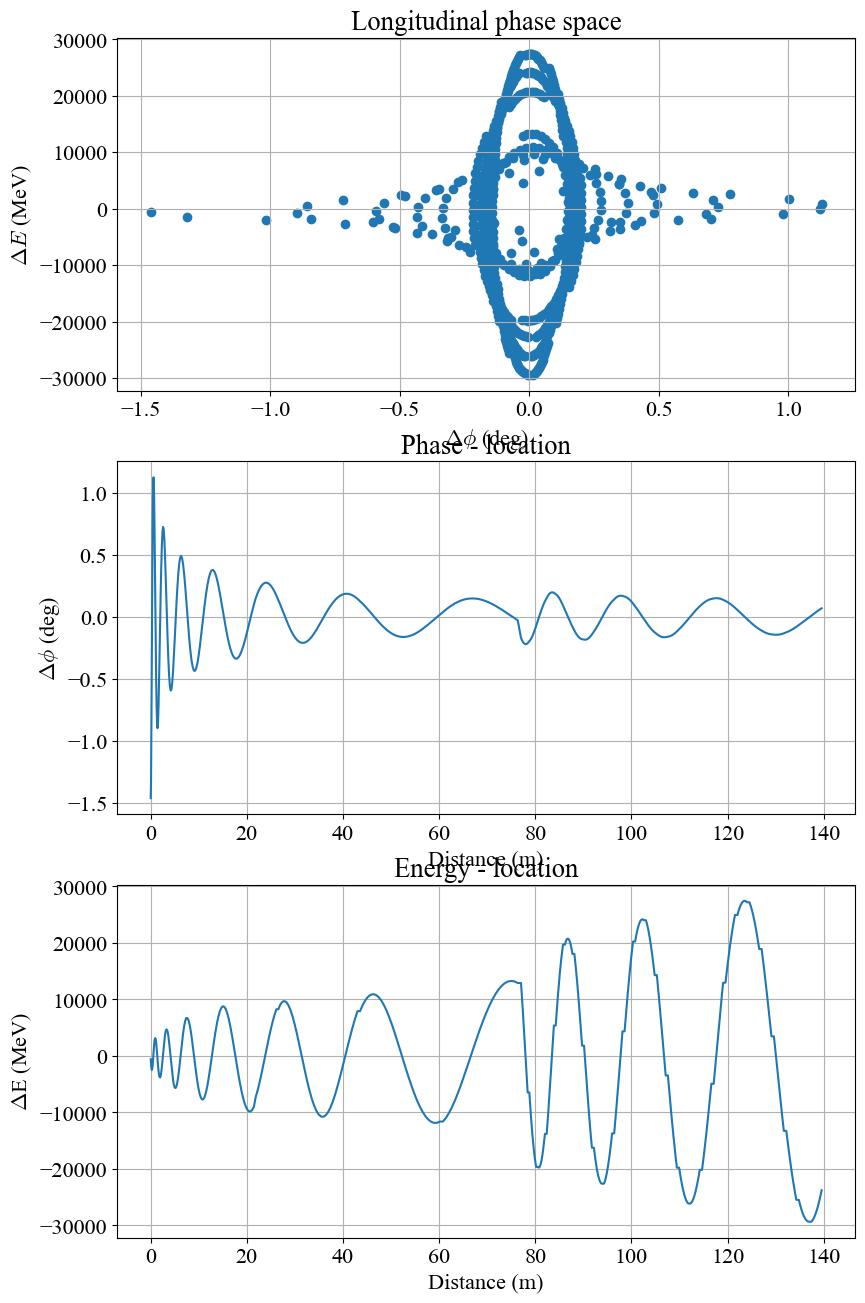

In [22]:
init_energy = 0.75e06 #MeV                                                                                                                                          
init_phase = -32 #deg                                                                                                                                        
synch_phase=-32.0

rP = [20] #delta phi in degrees, can take multiple entries                                                                                        
rE = [0.001e6] #delta E in MeV, can take multiple                                                                                                      
n = [1, 2, 3] # number of particles on circle, can take multiple                                                                                          

oneparticle = generate_part_gauss(init_energy,init_phase,synch_phase,rf_freq_L,rP,rE,n,vis=False)


particle=propagate_many_fromT1(df,oneparticle)
plot_all_osc(particle,-1)

# Propagate many particles with initial emittance only T5+HE

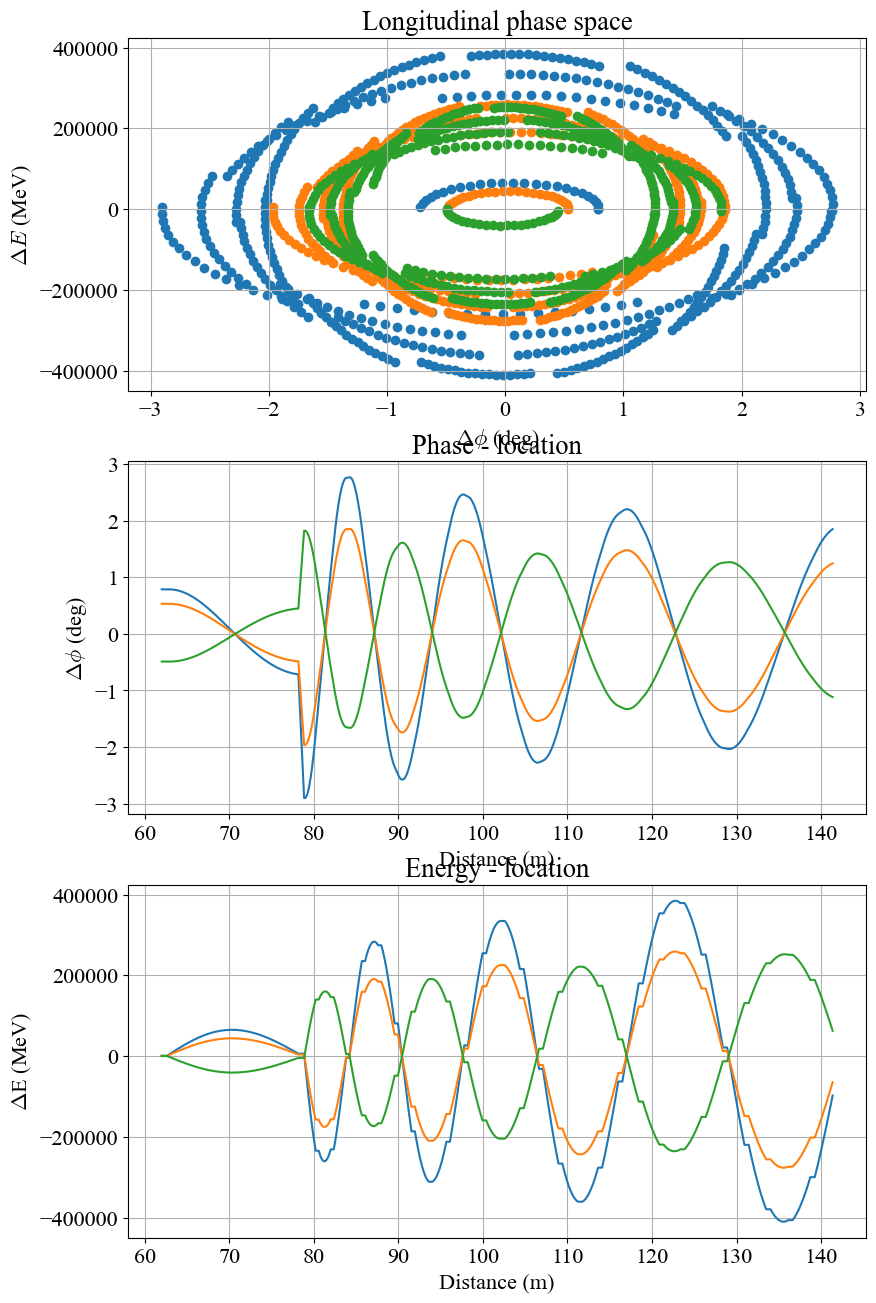

In [23]:
init_energy = 92.552e6#0.75e06 #MeV                                                                                                                                          
init_phase = -32 #deg                                                                                                                                        

rP = [2] #delta phi in degrees, can take multiple entries                                                                                         
rE = [0.001e6] #delta E in MeV, can take multiple                                                                                                       
n = [3] # number of particles on circle, can take multiple                                                                                          


#test = generate_part_circle(init_energy,init_phase,synch_phase,rf_freq_L,rP,rE,n,vis=True)
test = generate_part_gauss(init_energy,init_phase,synch_phase,rf_freq_L,rP,rE,n,vis=False)
#test = generate_part_synch(init_energy,synch_phase,n,vis=False)
test
partdfs=propagate_many_fromT5(df2,test)
plot_all_osc(partdfs,-1)

# Propagate synchronous particle with different dPhi at T2 and T5

In [24]:
init_length= 0
        
synch_phase=-32.0
synch_energy= 0.75e6

init_energy = synch_energy+0.00e6
init_phase = synch_phase-20 ##CHANGED
    
#Last LE turn
last_LE_cell = len(df_L)-1
  
#a = np.arange(-5,5.1,1)
#b = np.arange(-5,5.1,1)
a = np.linspace(-2,2,11)
b = np.linspace(-2,2,11)
c = list(itertools.product(a, b))

cells=[116,182]
RFdict = [dict(zip(cells,c[i])) for i in range(len(c))]

#print(RFdict)
T2T5scan = []

for rfd in RFdict:
    testtest = propagate_RFkick(df,synch_phase,synch_energy,init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell,rfd)   

    T2T5scan.append(testtest)


60 55


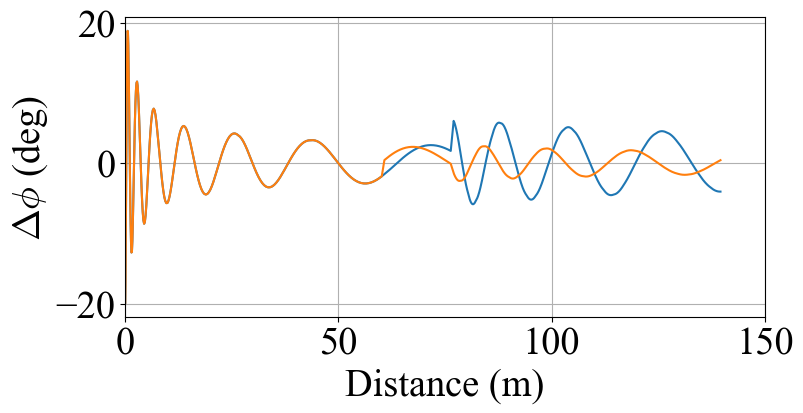

In [25]:
#print(c)
idx1 = c.index((0,0))
idx2 = c.index((0,-2))
print(idx1,idx2)
#plot_all_osc(,1)

plot_phase_osc_select(T2T5scan,[idx1,idx2])

In [26]:
T2T5scan[idx1].tail()

,E,dE,dPhi,l
679,3.987621e+08,87109.967248,-4.044795,139.034824
680,3.994354e+08,54124.765484,-4.056181,139.167437
681,4.001086e+08,21079.187588,-4.063238,139.300118
682,4.007818e+08,-11989.847436,-4.065979,139.432867
683,4.014550e+08,-45045.573536,-4.064424,139.565683


In [27]:
init_length= 0
        
synch_phase=-32.0
synch_energy= 0.75e6

init_energy = synch_energy+0.00e6
init_phase = synch_phase+0
    
#Last LE turn
last_LE_cell = len(df_L)-1

c = np.arange(-15,15,1)
cells=[0]

RFdict = [dict(zip(cells,[c])) for c in c]

print(RFdict)
T0scan = []

for rfd in RFdict:
    testtest = propagate_RFkick(df,synch_phase,synch_energy,init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell,rfd)   
    T0scan.append(testtest)


[{0: -15}, {0: -14}, {0: -13}, {0: -12}, {0: -11}, {0: -10}, {0: -9}, {0: -8}, {0: -7}, {0: -6}, {0: -5}, {0: -4}, {0: -3}, {0: -2}, {0: -1}, {0: 0}, {0: 1}, {0: 2}, {0: 3}, {0: 4}, {0: 5}, {0: 6}, {0: 7}, {0: 8}, {0: 9}, {0: 10}, {0: 11}, {0: 12}, {0: 13}, {0: 14}]


In [28]:
init_length= 0
        
synch_phase=-32.0
synch_energy= 0.75e6

init_energy = synch_energy+0.00e6
init_phase = synch_phase+0
    
#Last LE turn
last_LE_cell = len(df_L)-1

#c = np.arange(-15,15,1)
c = [-12,12]
cells=[0]

RFdict = [dict(zip(cells,[c])) for c in c]

print(RFdict)
T0 = []

for rfd in RFdict:
    testtest = propagate_RFkick(df,synch_phase,synch_energy,init_phase,init_energy,init_length,
              rf_freq_L,rf_freq_H,last_LE_cell,rfd)   
    T0.append(testtest)


[{0: -12}, {0: 12}]


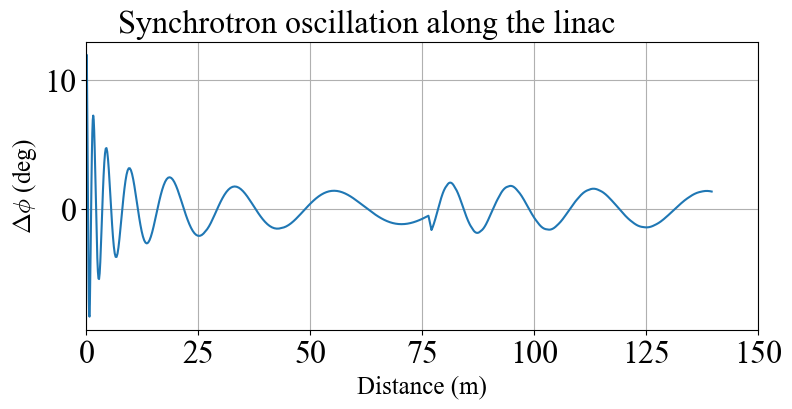

In [29]:
plot_phase_osc(T0,1)

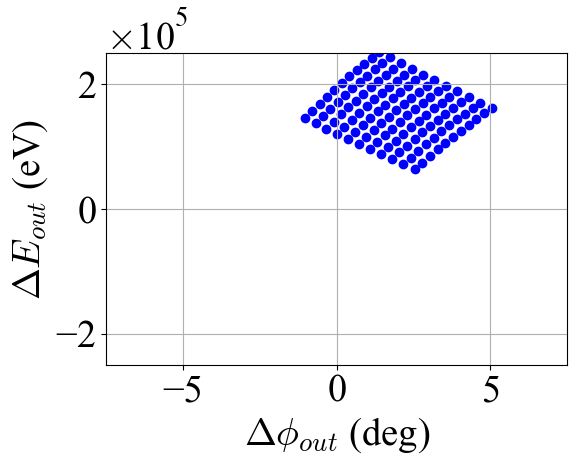

In [30]:
# plot_emittance(T0scan,207)
#%matplotlib widget
plt.rcParams.update({'font.size': 16, 'font.family': "Times New Roman",
                     'mathtext.fontset': 'cm', 'savefig.format' : 'pdf',
                    'axes.labelsize': 'xx-large',
                    'axes.titlesize':'xx-large',
                    'xtick.labelsize':'xx-large',
                    'ytick.labelsize':'xx-large',})


[plt.scatter(df['dPhi'].iloc[206],df['dE'].iloc[206],color='b') for df in T2T5scan];
#[plt.scatter(df['dPhi'].iloc[206],df['dE'].iloc[206],color='r') for df in T0scan];

plt.xlabel('$\Delta\phi_{out}$ (deg)')
plt.ylabel('$\Delta E_{out}$ (eV)')


from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((7,8)) 
plt.gca().yaxis.set_major_formatter(formatter) 

#plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.xlim(-7.5,7.5)
plt.ylim(-250000,250000)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(top=0.90)
plt.subplots_adjust(left=0.24)
plt.subplots_adjust(right=0.96)  
plt.grid()